<a href="https://colab.research.google.com/github/prajeshatm/hello/blob/main/CNN_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
9


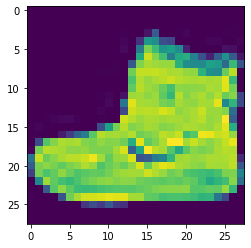

In [ ]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
#for i in range(9):
 # define subplot
 #pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 #pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.imshow(trainX[0])
print(trainy[0])
# show the figure
#pyplot.show()

In [ ]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
from tensorflow import keras
# one hot encode target values
trainy =keras.utils.to_categorical(trainy)
testy = keras.utils.to_categorical(testy)

In [ ]:

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
 # compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(trainX,trainy,batch_size=6000,epochs=7)

Epoch 1/7
10/10 [==============================] - 61s 5s/step - loss: 96.5226 - accuracy: 0.3020
Epoch 2/7
10/10 [==============================] - 49s 5s/step - loss: 13.5245 - accuracy: 0.5170
Epoch 3/7
10/10 [==============================] - 59s 6s/step - loss: 4.8246 - accuracy: 0.6304
Epoch 4/7
10/10 [==============================] - 47s 5s/step - loss: 2.8605 - accuracy: 0.6683
Epoch 5/7
10/10 [==============================] - 49s 5s/step - loss: 2.1161 - accuracy: 0.7000
Epoch 6/7
10/10 [==============================] - 48s 5s/step - loss: 1.6872 - accuracy: 0.7179
Epoch 7/7
10/10 [==============================] - 48s 5s/step - loss: 1.4038 - accuracy: 0.7372


In [ ]:
# save model
model.save('final_model.h5')

In [ ]:
from tensorflow.python.ops.gen_data_flow_ops import resource_accumulator_set_global_step_eager_fallback
# make a prediction for a new image.
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img
 
import numpy as np
# load an image and predict the class
def run_example():
 # load the image
 img = load_image('/content/sample_image.png')
 # load model
 model = load_model('final_model.h5')
 # predict the class
 result = model.predict(img)
 dic={0:'T-shirt/top',1: 'Trouser',2: 'Pullover',3:'Dress',4:'Coat',5:'Sandal',
      6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
 print(dic[np.argmax(result)])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 73ms/step
Shirt
